# Introduction

In this project, the overall problem is to predict whether it rains based on weather attributes from the previous days


# Imports

In [13]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# plot tree model
import graphviz

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Train-test splits and cross validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb

# Model metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from scipy.stats import uniform, randint

# Logistic function
from scipy.special import expit

# Plot missing values
import missingno as msno

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Regular expressions
import re

# The data

This project utilizes a single data set `rain.csv`. The data set contains information about whether it rained on successive days and many features about the weather.

`Date`
The date of observation

`MinTemp`
The minimum temperature in degrees celsius

`MaxTemp`
The maximum temperature in degrees celsius

`Rainfall`
The amount of rainfall recorded for the day in mm

`Evaporation`
The so-called Class A pan evaporation (mm) in the 24 hours to 9am

`Sunshine`
The number of hours of bright sunshine in the day.

`WindGustSpeed`
The speed (km/h) of the strongest wind gust in the 24 hours to midnight

`WindSpeed9am`
Wind speed (km/hr) averaged over 10 minutes prior to 9am

`WindSpeed3pm`
Wind speed (km/hr) averaged over 10 minutes prior to 3pm

`Humidity9am`
Humidity (percent) at 9am

`Humidity3pm`
Humidity (percent) at 3pm

`Pressure9am`
Atmospheric pressure (hpa) reduced to mean sea level at 9am

`Pressure3pm`
Atmospheric pressure (hpa) reduced to mean sea level at 3pm

`Cloud9am`
Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

`Cloud3pm`
Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

`Temp9am`
Temperature (degrees C) at 9am

`Temp3pm`
Temperature (degrees C) at 3pm

`RainToday`
Yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise No

`RISK_MM`
The amount of next day rain in mm. Used to create response variable RainTomorrow.

`RainTomorrow`
Yes if precipitation exceeds 1mm, otherwise No

# Load the data

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df=pd.read_csv("/content/drive/MyDrive/Projects/rain.csv")

## Explore the contents of the data sets

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   MinTemp        36543 non-null  float64
 2   MaxTemp        36639 non-null  float64
 3   Rainfall       36255 non-null  float64
 4   Evaporation    24035 non-null  float64
 5   Sunshine       23317 non-null  float64
 6   WindGustSpeed  33520 non-null  float64
 7   WindSpeed9am   36219 non-null  float64
 8   WindSpeed3pm   36235 non-null  float64
 9   Humidity9am    36311 non-null  float64
 10  Humidity3pm    36370 non-null  float64
 11  Pressure9am    33309 non-null  float64
 12  Pressure3pm    33329 non-null  float64
 13  Cloud9am       24381 non-null  float64
 14  Cloud3pm       23899 non-null  float64
 15  Temp9am        36394 non-null  float64
 16  Temp3pm        36437 non-null  float64
 17  RainToday      36255 non-null  object 
 18  RISK_M

In [17]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


Quick exploratory data analysis to determine whether the data is sufficient



In [18]:
dfp=df[["Sunshine","Rainfall","RainTomorrow"]]

In [19]:
dfp

,Sunshine,Rainfall,RainTomorrow
0,8.9,0.0,No
1,NaN,0.4,No
2,7.2,0.0,No
3,11.3,0.0,No
4,NaN,0.0,No
...,...,...,...
36876,0.0,7.4,Yes
36877,10.6,0.0,No
36878,11.1,0.0,No
36879,11.6,0.0,No


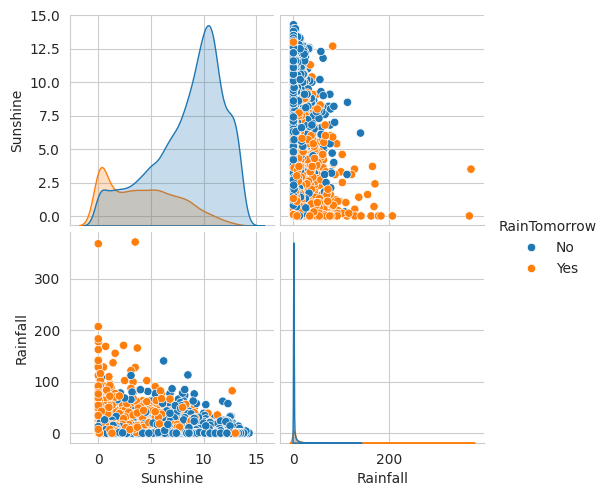

In [20]:
sns.pairplot(dfp,hue="RainTomorrow")

Yes the data is suitable

# Data preparation

## Quality control

##### $\rightarrow$ In below code, checking for duplicate rows

In [21]:
df.duplicated().sum()

0

In [22]:
df['RainTomorrow']=pd.get_dummies(df['RainTomorrow'], drop_first=True)
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,False
1,7/3/2009,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,False
2,2/18/2010,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,False
3,3/4/2010,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,False
4,9/9/2010,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,10.1,14.2,7.4,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,9.0,True
36877,9/24/2010,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,No,0.0,False
36878,5/6/2011,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,No,0.0,False
36879,10/12/2010,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,No,0.0,False


In [23]:
df['RainToday']=pd.get_dummies(df['RainToday'], drop_first=True)
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,False,0.0,False
1,7/3/2009,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,False,0.0,False
2,2/18/2010,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,False,0.2,False
3,3/4/2010,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,False,0.0,False
4,9/9/2010,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,False,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,10.1,14.2,7.4,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,True,9.0,True
36877,9/24/2010,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,False,0.0,False
36878,5/6/2011,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,False,0.0,False
36879,10/12/2010,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,False,0.0,False


## Rename columns

In [24]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,False,0.0,False
1,7/3/2009,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,False,0.0,False
2,2/18/2010,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,False,0.2,False
3,3/4/2010,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,False,0.0,False
4,9/9/2010,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,False,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,10.1,14.2,7.4,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,True,9.0,True
36877,9/24/2010,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,False,0.0,False
36878,5/6/2011,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,False,0.0,False
36879,10/12/2010,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,False,0.0,False


In [25]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Below code is to convert column names from CamelCase to snake_case




In [26]:
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()
    return re.sub('(.)([0-9][a-z]+)', r'\1_\2', name)

In [27]:
df.columns = [camel_to_snake(name) for name in df.columns]

In [28]:
df.head()

,date,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,risk_mm,rain_tomorrow
0,5/18/2009,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,False,0.0,False
1,7/3/2009,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,False,0.0,False
2,2/18/2010,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,False,0.2,False
3,3/4/2010,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,False,0.0,False
4,9/9/2010,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,False,0.4,False


## Identify missing values

In [29]:
df.isna().sum()

,0
date,0
min_temp,338
max_temp,242
rainfall,626
evaporation,12846
sunshine,13564
wind_gust_speed,3361
wind_speed_9am,662
wind_speed_3pm,646
humidity_9am,570


In [30]:
df=df.dropna(subset='rain_tomorrow')
df

,date,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,risk_mm,rain_tomorrow
0,5/18/2009,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,False,0.0,False
1,7/3/2009,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,False,0.0,False
2,2/18/2010,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,False,0.2,False
3,3/4/2010,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,False,0.0,False
4,9/9/2010,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,False,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,10.1,14.2,7.4,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,True,9.0,True
36877,9/24/2010,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,False,0.0,False
36878,5/6/2011,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,False,0.0,False
36879,10/12/2010,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,False,0.0,False


## Produce a train/test split for model comparison

## Train test split

In [31]:
X = df.drop(columns = ['date', 'rainfall', 'risk_mm','rain_tomorrow'])

y = df['rain_tomorrow']

In [32]:
class_names = ['no rain', 'yes rain']

##### $\rightarrow$ Splitting the data into training and testing sets. Keeping 20% of the data for the test set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

##### $\rightarrow$ Below code is to check that the training and testing input variables have similar means and standard deviations.

In [34]:
X_train.agg(['mean','std']).round(2).T

,mean,std
min_temp,12.24,6.40
max_temp,22.95,6.98
evaporation,5.20,3.83
sunshine,7.54,3.83
wind_gust_speed,40.37,13.54
wind_speed_9am,14.21,8.99
wind_speed_3pm,18.88,8.79
humidity_9am,69.15,18.24
humidity_3pm,52.26,20.23
pressure_9am,1017.27,7.19


In [35]:
X_test.agg(['mean','std']).round(2).T

,mean,std
min_temp,12.21,6.33
max_temp,22.92,7.03
evaporation,5.14,3.49
sunshine,7.57,3.84
wind_gust_speed,40.47,13.60
wind_speed_9am,14.23,9.03
wind_speed_3pm,18.84,8.81
humidity_9am,69.13,18.53
humidity_3pm,52.51,20.65
pressure_9am,1017.32,7.14


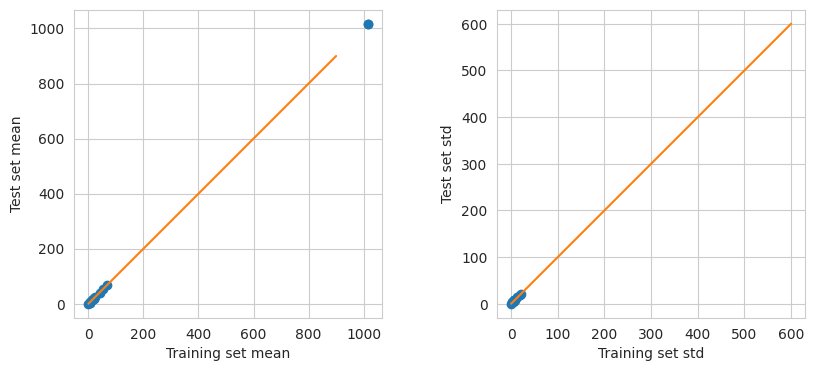

In [36]:
plt.subplots(1,2, figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(X_train.mean(), X_test.mean(), 'o')
plt.plot([0, 900], [0, 900])

plt.xlabel('Training set mean')
plt.ylabel('Test set mean')
plt.axis('square')

plt.subplot(1,2,2)
plt.plot(X_train.std(), X_test.std(), 'o')
plt.plot([0, 600], [0, 600])

plt.xlabel('Training set std')
plt.ylabel('Test set std')
plt.axis('square');

##### $\rightarrow$ Below code is to check that the training and testing input variables have similar proportions of days where it rained today.

In [37]:
y_train.value_counts(normalize=True)

,proportion
rain_tomorrow,
False,0.769184
True,0.230816


In [38]:
y_test.value_counts(normalize=True)

,proportion
rain_tomorrow,
False,0.766978
True,0.233022


## Scale the numerical predictor variables in the training set to have mean 0 and standard deviation 1.

In [39]:
numerical_columns = X_train.select_dtypes(include='number').columns.to_list()

In [40]:
numerical_columns

['min_temp',
 'max_temp',
 'evaporation',
 'sunshine',
 'wind_gust_speed',
 'wind_speed_9am',
 'wind_speed_3pm',
 'humidity_9am',
 'humidity_3pm',
 'pressure_9am',
 'pressure_3pm',
 'cloud_9am',
 'cloud_3pm',
 'temp_9am',
 'temp_3pm']

In [41]:
scaler = StandardScaler().fit(X_train[numerical_columns])

In [42]:
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

##### $\rightarrow$ Perform the scaling transform on the predictors in the training and testing sets.

##### $\rightarrow$ Checking the mean and standard deviation of the transformed data.

In [43]:
print(np.mean(X_train[numerical_columns], axis = 0).round(2))
print(np.std(X_train[numerical_columns], axis = 0))

print(np.mean(X_test[numerical_columns], axis = 0).round(2))
print(np.std(X_test[numerical_columns], axis = 0).round(2))

min_temp           0.0
max_temp          -0.0
evaporation       -0.0
sunshine           0.0
wind_gust_speed    0.0
wind_speed_9am     0.0
wind_speed_3pm    -0.0
humidity_9am      -0.0
humidity_3pm       0.0
pressure_9am      -0.0
pressure_3pm       0.0
cloud_9am         -0.0
cloud_3pm          0.0
temp_9am           0.0
temp_3pm          -0.0
dtype: float64
min_temp           1.0
max_temp           1.0
evaporation        1.0
sunshine           1.0
wind_gust_speed    1.0
wind_speed_9am     1.0
wind_speed_3pm     1.0
humidity_9am       1.0
humidity_3pm       1.0
pressure_9am       1.0
pressure_3pm       1.0
cloud_9am          1.0
cloud_3pm          1.0
temp_9am           1.0
temp_3pm           1.0
dtype: float64
min_temp          -0.01
max_temp          -0.00
evaporation       -0.02
sunshine           0.01
wind_gust_speed    0.01
wind_speed_9am     0.00
wind_speed_3pm    -0.00
humidity_9am      -0.00
humidity_3pm       0.01
pressure_9am       0.01
pressure_3pm       0.00
cloud_9am       

## Data imputation

##### $\rightarrow$ Below code uses an imputation method to replace missing values in the columns corresponding to predictor variables in the analysis.

In [44]:
X_train

,min_temp,max_temp,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today
8894,-0.022375,-0.651493,NaN,NaN,0.415857,-0.135053,-0.669501,0.210961,0.728678,0.588014,0.259132,1.284580,-1.307429,-0.234798,-0.557999,False
29574,-0.678191,-0.006506,-0.365935,0.433608,-1.504766,-0.913915,-1.124704,-0.501656,-1.297747,0.782794,0.696024,0.581736,-0.177821,-0.390184,0.162092,False
30004,-0.709420,-0.780490,0.156186,1.138314,1.967129,1.756467,2.744526,-0.501656,-1.198897,0.170628,1.020169,-0.121109,0.198715,-0.825264,-0.704957,True
34617,0.258689,0.566816,NaN,NaN,0.415857,-0.135053,0.127106,-0.172756,-1.100047,-0.552840,-0.811957,NaN,NaN,0.464438,0.632356,False
18813,0.086928,-0.465163,0.365035,-0.062296,0.711337,1.867733,1.834119,1.142845,0.432128,-1.721520,-1.079729,1.284580,0.951786,-0.328029,-0.425738,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-0.553273,0.523817,NaN,NaN,-0.101234,0.643808,-0.214297,0.923578,-1.100047,0.045413,0.132293,1.284580,NaN,-0.623262,0.397224,False
32511,-0.319053,-1.153149,-0.731421,-0.714802,1.819389,1.088871,2.289322,0.978395,1.124078,-1.331960,-1.178382,0.230314,0.575251,-0.902957,-1.028263,True
5192,-1.162245,-1.282147,-1.253543,0.016004,-0.248974,-0.580117,0.013305,1.526561,0.530978,1.561914,1.527527,-1.175376,-0.930893,-1.415730,-1.219308,False
12172,-1.115401,0.538150,-0.365935,0.459708,0.415857,0.087478,0.809911,-0.282389,-1.693146,0.156716,0.019547,0.581736,-1.307429,-0.825264,0.661748,False


In [45]:
imputer = IterativeImputer()

In [46]:
impute_columns = X_train.columns.to_list()

In [47]:
imputer.fit(X_train.loc[:, impute_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer()

In [48]:
X_train.loc[:, impute_columns] = imputer.transform(X_train.loc[:, impute_columns])

In [49]:
X_train.isna().sum()

,0
min_temp,0
max_temp,0
evaporation,0
sunshine,0
wind_gust_speed,0
wind_speed_9am,0
wind_speed_3pm,0
humidity_9am,0
humidity_3pm,0
pressure_9am,0


In [50]:
X_test.loc[:, impute_columns] = imputer.transform(X_test.loc[:, impute_columns])

In [51]:
X_test.isna().sum()

,0
min_temp,0
max_temp,0
evaporation,0
sunshine,0
wind_gust_speed,0
wind_speed_9am,0
wind_speed_3pm,0
humidity_9am,0
humidity_3pm,0
pressure_9am,0


##### $\rightarrow$ Joining the predictor variables and output variable for the training and testing data.

In [52]:
df_train = X_train.join(y_train)

In [53]:
df_train.head()

,min_temp,max_temp,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
8894,-0.022375,-0.651493,-0.435160,-0.458601,0.415857,-0.135053,-0.669501,0.210961,0.728678,0.588014,0.259132,1.284580,-1.307429,-0.234798,-0.557999,0.0,False
29574,-0.678191,-0.006506,-0.365935,0.433608,-1.504766,-0.913915,-1.124704,-0.501656,-1.297747,0.782794,0.696024,0.581736,-0.177821,-0.390184,0.162092,0.0,False
30004,-0.709420,-0.780490,0.156186,1.138314,1.967129,1.756467,2.744526,-0.501656,-1.198897,0.170628,1.020169,-0.121109,0.198715,-0.825264,-0.704957,1.0,False
34617,0.258689,0.566816,0.223633,0.452834,0.415857,-0.135053,0.127106,-0.172756,-1.100047,-0.552840,-0.811957,-0.303375,-0.376127,0.464438,0.632356,0.0,False
18813,0.086928,-0.465163,0.365035,-0.062296,0.711337,1.867733,1.834119,1.142845,0.432128,-1.721520,-1.079729,1.284580,0.951786,-0.328029,-0.425738,1.0,False


In [54]:
df_test = X_test.join(y_test)

In [55]:
df_test.head()

,min_temp,max_temp,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
19933,0.633441,0.294488,0.508925,0.172606,-0.101234,-0.913915,0.013305,-0.282389,-0.012697,0.810620,0.921516,0.034070,-0.173278,0.060435,0.029831,0.0,False
195,-1.708759,-1.210481,-1.044694,0.355307,-1.209286,-0.580117,-0.669501,1.252478,-1.001197,2.021038,2.077165,-1.175376,-1.307429,-1.881887,-1.101742,0.0,False
31422,-0.834337,-0.092504,0.365035,1.764720,-0.544455,0.087478,0.013305,-0.337206,0.036728,0.226280,0.273225,-1.175376,-1.683965,-0.001719,0.000439,0.0,False
35992,-0.928025,-1.124483,-0.104875,0.485808,1.228428,0.643808,2.061721,-0.666106,-1.198897,-0.121542,-0.163666,-1.175376,-1.683965,-0.825264,-1.072351,0.0,False
9747,-0.771879,-0.837822,-0.783633,-0.297198,-1.578636,-1.581510,-1.124704,1.252478,0.036728,1.951474,1.865765,0.933158,0.951786,-1.182651,-0.690261,0.0,False


# Exploratory data analysis

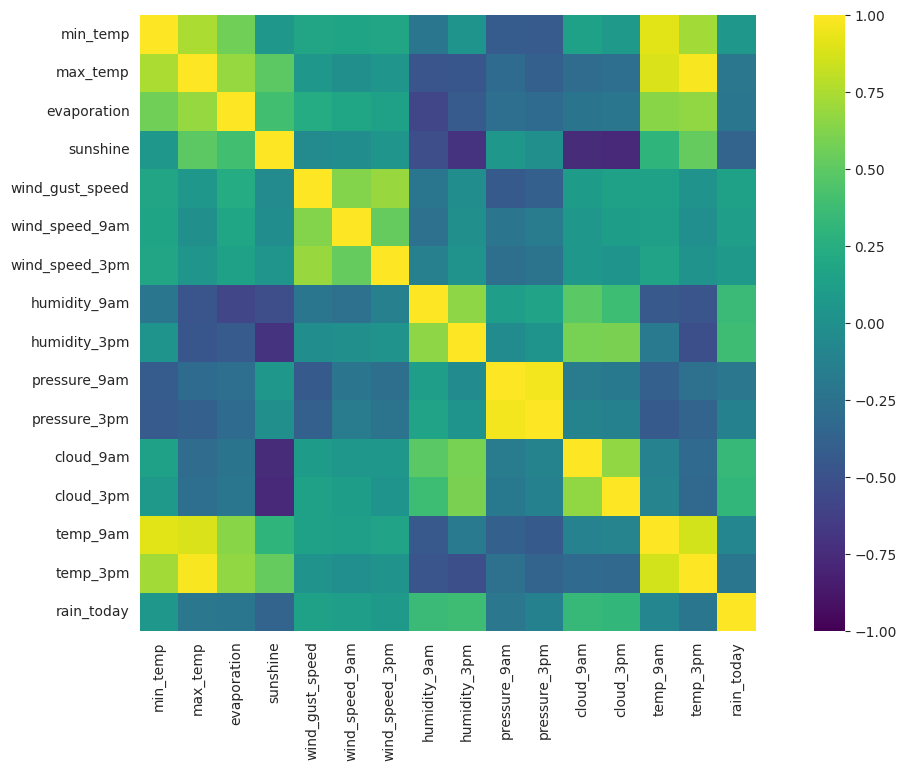

In [56]:
corr_matrix = X_train.corr()

plt.figure(figsize=(15,8))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, cmap='viridis')

plt.tick_params(labelsize=10);

In [57]:
df_train

,min_temp,max_temp,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
8894,-0.022375,-0.651493,-0.435160,-0.458601,0.415857,-0.135053,-0.669501,0.210961,0.728678,0.588014,0.259132,1.284580,-1.307429,-0.234798,-0.557999,0.0,False
29574,-0.678191,-0.006506,-0.365935,0.433608,-1.504766,-0.913915,-1.124704,-0.501656,-1.297747,0.782794,0.696024,0.581736,-0.177821,-0.390184,0.162092,0.0,False
30004,-0.709420,-0.780490,0.156186,1.138314,1.967129,1.756467,2.744526,-0.501656,-1.198897,0.170628,1.020169,-0.121109,0.198715,-0.825264,-0.704957,1.0,False
34617,0.258689,0.566816,0.223633,0.452834,0.415857,-0.135053,0.127106,-0.172756,-1.100047,-0.552840,-0.811957,-0.303375,-0.376127,0.464438,0.632356,0.0,False
18813,0.086928,-0.465163,0.365035,-0.062296,0.711337,1.867733,1.834119,1.142845,0.432128,-1.721520,-1.079729,1.284580,0.951786,-0.328029,-0.425738,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-0.553273,0.523817,0.061870,-0.142591,-0.101234,0.643808,-0.214297,0.923578,-1.100047,0.045413,0.132293,1.284580,0.364453,-0.623262,0.397224,0.0,False
32511,-0.319053,-1.153149,-0.731421,-0.714802,1.819389,1.088871,2.289322,0.978395,1.124078,-1.331960,-1.178382,0.230314,0.575251,-0.902957,-1.028263,1.0,True
5192,-1.162245,-1.282147,-1.253543,0.016004,-0.248974,-0.580117,0.013305,1.526561,0.530978,1.561914,1.527527,-1.175376,-0.930893,-1.415730,-1.219308,0.0,False
12172,-1.115401,0.538150,-0.365935,0.459708,0.415857,0.087478,0.809911,-0.282389,-1.693146,0.156716,0.019547,0.581736,-1.307429,-0.825264,0.661748,0.0,False


In [58]:
df

,date,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,risk_mm,rain_tomorrow
0,5/18/2009,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,False,0.0,False
1,7/3/2009,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,False,0.0,False
2,2/18/2010,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,False,0.2,False
3,3/4/2010,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,False,0.0,False
4,9/9/2010,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,False,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,10.1,14.2,7.4,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,True,9.0,True
36877,9/24/2010,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,False,0.0,False
36878,5/6/2011,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,False,0.0,False
36879,10/12/2010,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,False,0.0,False


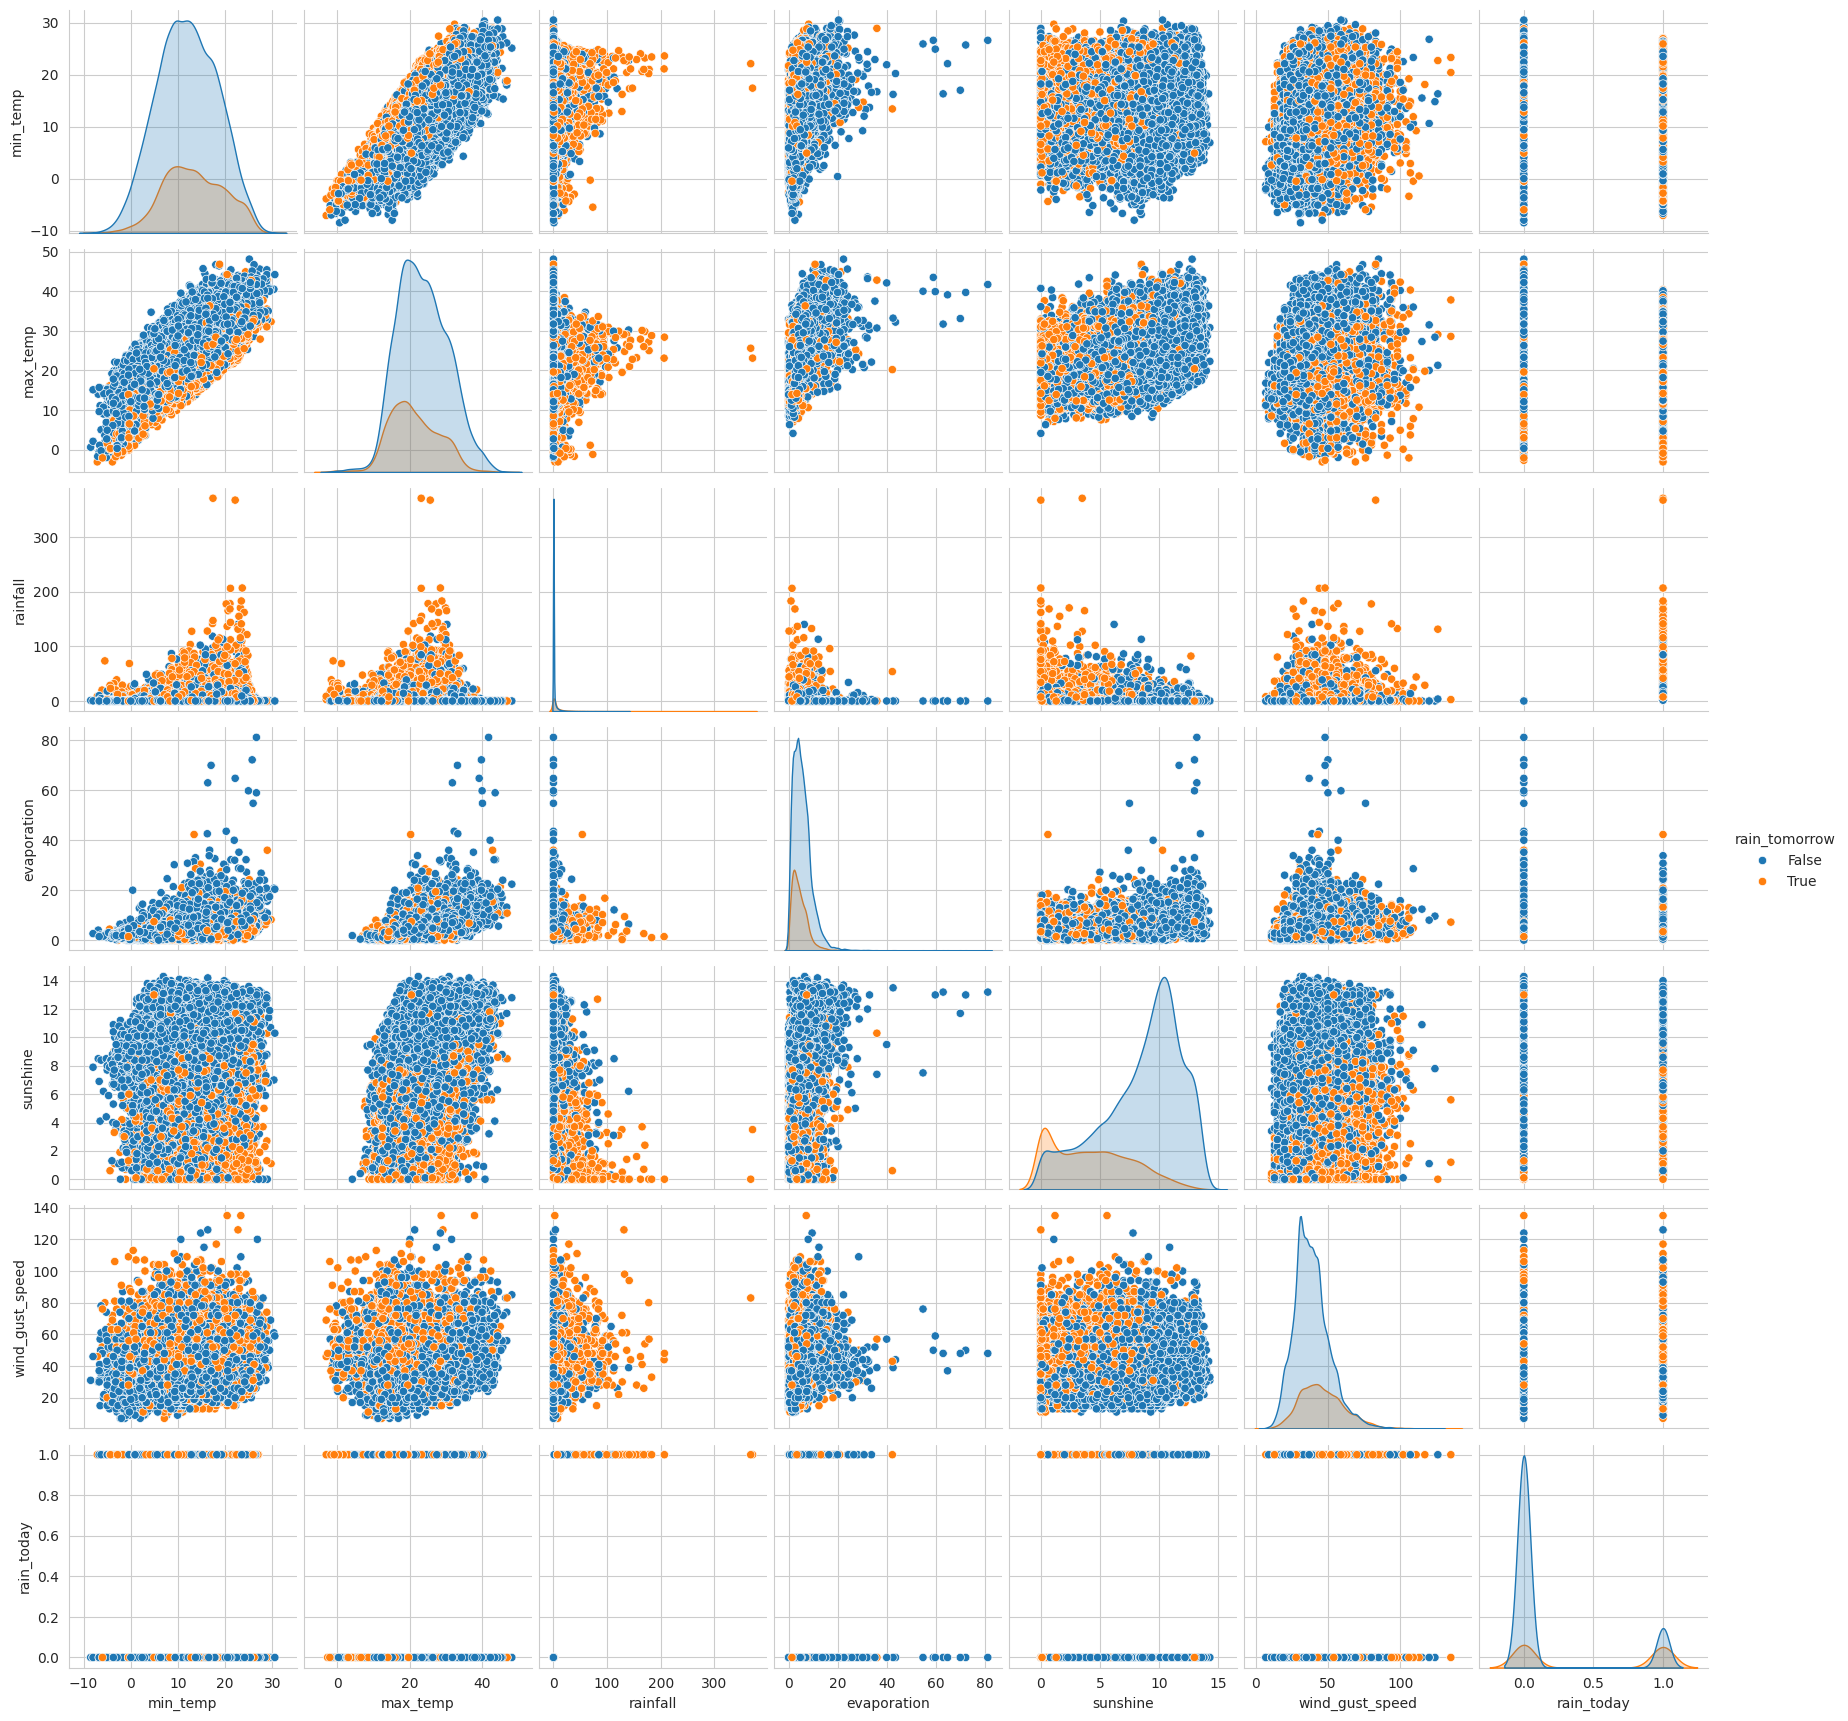

In [59]:
sns.pairplot(data = df.drop(['date','risk_mm','wind_speed_9am',	'wind_speed_3pm',	'humidity_9am',	'humidity_3pm',	'pressure_9am',	'pressure_3pm',	'cloud_9am',	'cloud_3pm',	'temp_9am',	'temp_3pm'],axis=1), hue='rain_tomorrow');

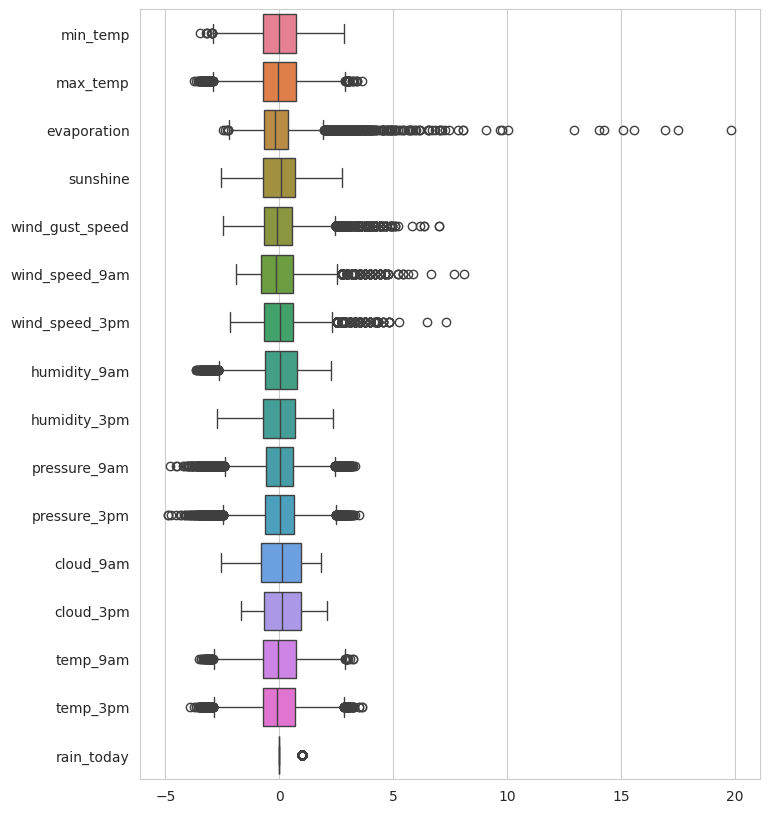

In [60]:
plt.figure(figsize=(8,10))
sns.boxplot(data=X_train, orient='h');

# Modeling

In [61]:
xgb_model = xgb.XGBClassifier()
param_dist = {
    'colsample_bytree': uniform(loc=0.5, scale=0.5),
    'gamma': uniform(loc=0, scale=1),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(low=50, high=1000),
    'subsample': uniform(loc=0.5, scale=0.5)
}


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=1,
    return_train_score=True
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2a542950f0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2a5430c6a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2a4f2e9bd0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2a4f2e82e0>},
                   return_train_score=True, verbose=1)

In the above code, RandomizedSearchCV is used to find best values for few parameters of XGboost model

In [62]:
random_search.best_params_

{'colsample_bytree': 0.8368128509140083,
 'gamma': 0.9510710516606008,
 'learning_rate': 0.016999865177794296,
 'max_depth': 7,
 'n_estimators': 414,
 'subsample': 0.650812377166726}

In [63]:
xgb_model = xgb.XGBClassifier()
xgb_model.set_params(**random_search.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8368128509140083, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.9510710516606008,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.016999865177794296,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=414, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8368128509140083, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.9510710516606008,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.016999865177794296,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=414, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

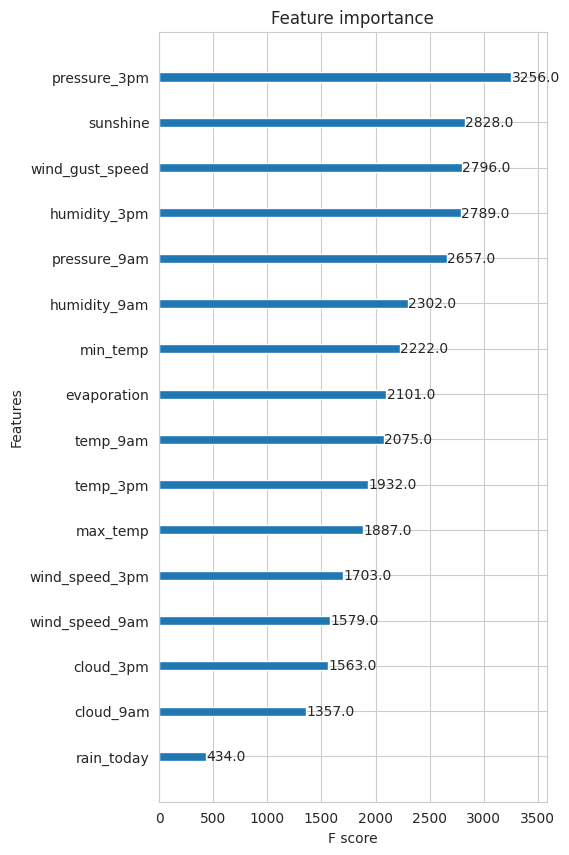

In [65]:
fig, ax = plt.subplots(figsize = (5,10))
xgb.plot_importance(xgb_model, ax = ax);

In [66]:
pred_mgb = xgb_model.predict(X_test)

In the above code, prediction is done

In [67]:
mat_mgb = confusion_matrix(y_test, pred_mgb)

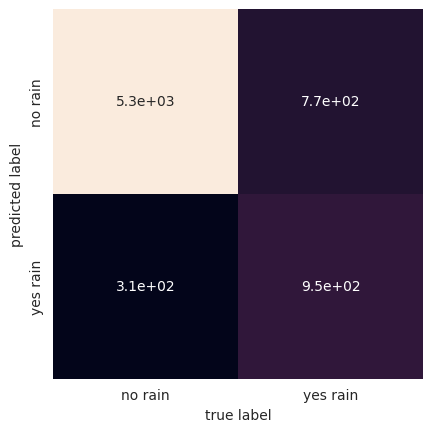

In [68]:
sns.heatmap(mat_mgb.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [69]:
print(classification_report(y_test, pred_mgb, target_names=class_names))

              precision    recall  f1-score   support

     no rain       0.87      0.94      0.91      5658
    yes rain       0.75      0.55      0.64      1719

    accuracy                           0.85      7377
   macro avg       0.81      0.75      0.77      7377
weighted avg       0.85      0.85      0.84      7377



In the above code, classification report is printed


In [70]:
y_train.value_counts()

,count
rain_tomorrow,
False,22694
True,6810


In [71]:
pred_null = np.zeros(len(y_test))

In [72]:
mat_null = confusion_matrix(y_test, pred_null)

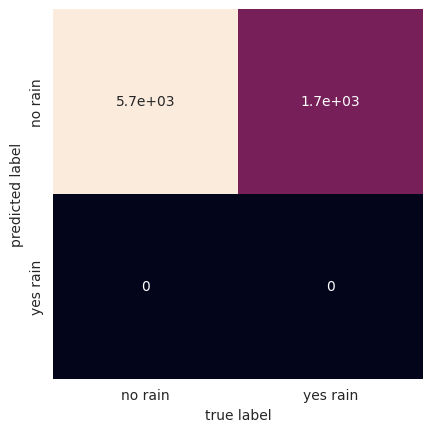

In [73]:
sns.heatmap(mat_null.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [74]:
print(classification_report(y_test, pred_null, target_names=class_names))

              precision    recall  f1-score   support

     no rain       0.77      1.00      0.87      5658
    yes rain       0.00      0.00      0.00      1719

    accuracy                           0.77      7377
   macro avg       0.38      0.50      0.43      7377
weighted avg       0.59      0.77      0.67      7377



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In the above code, null model is made use for comparison